In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# helper function
def best_k(image,k):
    ''' Function to show n_color cluster '''
    
    # reshaping our image
    reshaped_image = np.float32(image).reshape(-1,3)
    
    # defining exit criteria 
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,20,1.0)
    
    # getting lable and center values
    ret,label,center = cv2.kmeans(reshaped_image, k , None, criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    
    # converting to center to integer datatype
    center = np.uint8(center)
    
    # flatting label data
    result = center[label.flatten()]
    
    # storing the result after reshaping it with image size
    result = result.reshape(image.shape)
    
    # return output of function
    return result

(325, 562, 3)


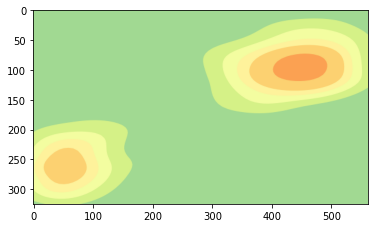

In [3]:
# reading image
image = cv2.imread('sample_image.jpg')

# converting color to RGB
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# printing the image
plt.imshow(image)

# printing the shape of image
print(image.shape)

#### Our image has 325 rows and 562 columns and 3 colors

In [4]:
# to store red green blue and green color from image
red = []
green = []
blue = []

# iterate over each pixel and find the color
for row in image:
    for pixel in row:
        
        # we get rgb color from each pixel
        red_color, green_color, blue_color = pixel
        
        # storing pixel color in their respective color list
        red.append(red_color)
        green.append(green_color)        
        blue.append(blue_color)     

# creating dataframe for our colors to store
color_dataframe = pd.DataFrame({'Red':red,'Green':green,'Blue':blue})

# printing the head of our data
color_dataframe.head()

Red  Green  Blue
0  161    217   146
1  161    217   146
2  161    217   146
3  161    217   146
4  161    217   146

In [5]:
# storing the values of our dataframe in X
X = color_dataframe[['Red','Green','Blue']].values

# to store errors
sum_square_error = []

# applying diffrent k values and get their errors
for cluster in range(2,8): 
    
    # initializing kmeans 
    kmeans = KMeans(n_clusters=cluster,random_state=42)
    
    # fitting our data
    kmeans.fit(X)
    
    # predicted data 
    predicted_cluster = kmeans.predict(X)
    
    # storing the error is our list
    sum_square_error.append(kmeans.inertia_)

# creating dataframe of cluster and error
cluster_error_dataframe = pd.DataFrame({'Cluster':range(2,8) , 'Error':sum_square_error})

# printing our dataframe
print(cluster_error_dataframe)

   Cluster         Error
0        2  7.257899e+07
1        3  2.811948e+07
2        4  1.004472e+07
3        5  1.995733e+06
4        6  5.816367e+05
5        7  3.814245e+05


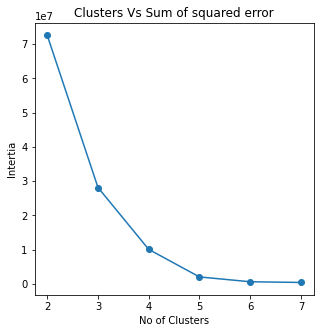

In [6]:
# plot the graph cluster vs error
plt.figure(figsize=(5,5))
plt.plot(cluster_error_dataframe['Cluster'],cluster_error_dataframe['Error'],marker='o')
plt.title('Clusters Vs Sum of squared error')
plt.xlabel('No of Clusters')
plt.ylabel('Intertia')
plt.show()

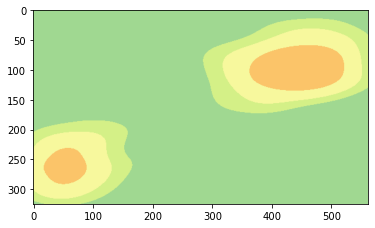

In [7]:
# using best k and printing output
plt.imshow(best_k(image,4))
plt.show()